# Project 5

### Table of Contents

* [Problem Statement](#Problem-Statement)
* [Data Dictionary](#Data-Dictionary)
* [2019 Crash Data](#2019-Crash-Data)
* [2020 Crash Data](#2020-Crash-Data)

### Problem Statement 

Is there a day of the week and/or time of day that correlates to car crashes in Chicago?

<b> https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if

### Data Dictionary



|Feature|Type|Dataset|Description|
|---|---|---|---|
|

Imports

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 55)
sns.set_style(style='darkgrid')
pd.set_option('display.max_rows', 200)

### 2019 Crash Data

In [54]:
df_19 = pd.read_csv('data/Traffic_Crashes__Crashes_2019.csv')

In [42]:
df_19.shape

(117427, 49)

In [43]:
df_19.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,cb2b9a910babe20dfad7fc27c04c29e7b199fa94dc57bf1ec97...,JC111663,NaN,01/01/2019 12:00:00 AM,35,NO CONTROLS,NO CONTROLS,UNKNOWN,UNKNOWN,PARKED MOTOR VEHICLE,NOT DIVIDED,2.0,STRAIGHT AND LEVEL,UNKNOWN,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,Y,"OVER $1,500",01/10/2019 02:00:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,1600,E,56TH ST,235,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,3,1,41.793502,-87.586407,POINT (-87.586406738035 41.793502271093)
1,efa10cf15e9c7c9df8a9e946a85eda9836f66af895c98269e32...,JC100635,Y,01/01/2019 12:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,ONE-WAY,1.0,STRAIGHT AND LEVEL,WET,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,Y,"OVER $1,500",01/01/2019 12:10:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,3332,W,MAYPOLE AVE,1123,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,3,1,41.883685,-87.710043,POINT (-87.710042988194 41.883684713555)
2,0777b210b7a60ac1338d90e20520d421c3241971049303ff115...,JC100780,NaN,01/01/2019 12:01:00 AM,30,NO CONTROLS,NO CONTROLS,UNKNOWN,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NOT ON SCENE (DESK REPORT),INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,Y,"OVER $1,500",01/01/2019 02:30:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,1649,W,ADDISON ST,1922,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,3,1,41.946856,-87.670809,POINT (-87.67080913181 41.946856430289)
3,caa1629056b16f2e6ec6797d6252d6da8ec1142c0ee982a8b3f...,JC100033,NaN,01/01/2019 12:04:00 AM,20,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,ONE-WAY,2.0,STRAIGHT AND LEVEL,WET,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,Y,NaN,NaN,"$501 - $1,500",01/01/2019 12:14:00 AM,IMPROPER OVERTAKING/PASSING,DISREGARDING ROAD MARKINGS,188,W,MADISON ST,122,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0,3,1,41.882058,-87.633478,POINT (-87.633478360366 41.882058104945)
4,cb22668bf69d9c99e50c615a9ff996328190859a0e83510ce9a...,JC100171,NaN,01/01/2019 12:07:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,ONE-WAY,1.0,STRAIGHT AND LEVEL,DRY,UNKNOWN,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,Y,"OVER $1,500",01/01/2019 12:07:00 AM,"OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, N...",FAILING TO REDUCE SPEED TO AVOID CRASH,4054,N,MOBILE AVE,1624,NaN,NaN,NaN,NaN,NaN,NaN,3,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0,3,1,41.954529,-87.784311,POINT (-87.784311465374 41.9545292855)


In [44]:
df_19.isnull().sum()

CRASH_RECORD_ID                       0
RD_NO                                 0
CRASH_DATE_EST_I                 108787
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                          98175
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                        3609
CRASH_TYPE                            0
INTERSECTION_RELATED_I            89521
NOT_RIGHT_OF_WAY_I               111617
HIT_AND_RUN_I                     84161
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0


Dropping columns that are over 90% nulls.

In [55]:
df_19.drop(columns = ['PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 
                       'WORKERS_PRESENT_I', 'HIT_AND_RUN_I', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I',
                       'LANE_CNT', 'CRASH_DATE_EST_I'], inplace = True)

In [56]:
df_19.isnull().sum().sort_values()

CRASH_RECORD_ID                     0
CRASH_MONTH                         0
CRASH_DAY_OF_WEEK                   0
CRASH_HOUR                          0
NUM_UNITS                           0
BEAT_OF_OCCURRENCE                  0
STREET_NAME                         0
STREET_DIRECTION                    0
STREET_NO                           0
PRIM_CONTRIBUTORY_CAUSE             0
DATE_POLICE_NOTIFIED                0
DAMAGE                              0
CRASH_TYPE                          0
SEC_CONTRIBUTORY_CAUSE              0
ROAD_DEFECT                         0
ROADWAY_SURFACE_COND                0
ALIGNMENT                           0
TRAFFICWAY_TYPE                     0
RD_NO                               0
FIRST_CRASH_TYPE                    0
LIGHTING_CONDITION                  0
WEATHER_CONDITION                   0
DEVICE_CONDITION                    0
TRAFFIC_CONTROL_DEVICE              0
CRASH_DATE                          0
POSTED_SPEED_LIMIT                  0
INJURIES_UNK

Dropping 'INJURIES_UNKNOWN' since all values are 0.

In [57]:
df_19.drop(columns = ['INJURIES_UNKNOWN'], inplace = True)

Dropping irrelevant column.

In [131]:
df_19.drop(columns = ['REPORT_TYPE','CRASH_RECORD_ID','BEAT_OF_OCCURRENCE ', 'DATE_POLICE_NOTIFIED'], inplace = True)

KeyError: "['REPORT_TYPE' 'CRASH_RECORD_ID' 'BEAT_OF_OCCURRENCE '\n 'DATE_POLICE_NOTIFIED'] not found in axis"

Filling in nulls with 0.

In [59]:
df_19['INJURIES_NO_INDICATION'].fillna('0', inplace = True)
df_19['INJURIES_REPORTED_NOT_EVIDENT'].fillna('0', inplace = True)
df_19['INJURIES_TOTAL'].fillna('0', inplace = True)
df_19['INJURIES_INCAPACITATING'].fillna('0', inplace = True)
df_19['INJURIES_FATAL'].fillna('0', inplace = True)
df_19['INJURIES_NON_INCAPACITATING'].fillna('0', inplace = True)

Filling nulls with 'NO INDICATION OF INJURY' for column 'MOST_SEVERE_INJURY' since that is the most common value and most likely to be the case if nothing was reported.

In [60]:
df_19['MOST_SEVERE_INJURY'].fillna('NO INDICATION OF INJURY', inplace = True)

Drop remaining null values.

In [61]:
df_19.dropna(inplace = True)

In [62]:
df_19.set_index('RD_NO')

,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
RD_NO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
JC111663,01/01/2019 12:00:00 AM,35,NO CONTROLS,NO CONTROLS,UNKNOWN,UNKNOWN,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,1600,E,56TH ST,235,2,NO INDICATION OF INJURY,0,0,0,0,0,1,0,3,1,41.793502,-87.586407,POINT (-87.586406738035 41.793502271093)
JC100635,01/01/2019 12:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,3332,W,MAYPOLE AVE,1123,2,NO INDICATION OF INJURY,0,0,0,0,0,1,0,3,1,41.883685,-87.710043,POINT (-87.710042988194 41.883684713555)
JC100780,01/01/2019 12:01:00 AM,30,NO CONTROLS,NO CONTROLS,UNKNOWN,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,1649,W,ADDISON ST,1922,2,NO INDICATION OF INJURY,0,0,0,0,0,1,0,3,1,41.946856,-87.670809,POINT (-87.67080913181 41.946856430289)
JC100033,01/01/2019 12:04:00 AM,20,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,ONE-WAY,STRAIGHT AND LEVEL,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",IMPROPER OVERTAKING/PASSING,DISREGARDING ROAD MARKINGS,188,W,MADISON ST,122,2,NO INDICATION OF INJURY,0,0,0,0,0,2,0,3,1,41.882058,-87.633478,POINT (-87.633478360366 41.882058104945)
JC100171,01/01/2019 12:07:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,UNKNOWN,NO INJURY / DRIVE AWAY,"OVER $1,500","OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, N...",FAILING TO REDUCE SPEED TO AVOID CRASH,4054,N,MOBILE AVE,1624,3,NO INDICATION OF INJURY,0,0,0,0,0,5,0,3,1,41.954529,-87.784311,POINT (-87.784311465374 41.9545292855)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
JC566001,12/30/2019 11:13:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,BLOWING SNOW,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,STRAIGHT AND LEVEL,SNOW OR SLUSH,UNKNOWN,INJURY AND / OR TOW DUE TO CRASH,"$501 - $1,500",DISREGARDING TRAFFIC SIGNALS,DISREGARDING TRAFFIC SIGNALS,3800,S,CALIFORNIA AVE,911,2,NONINCAPACITATING INJURY,1,0,0,1,0,1,23,2,12,41.824566,-87.694807,POINT (-87.69480737563 41.824566227681)
JC566028,12/30/2019 11:15:00 PM,30,UNKNOWN,UNKNOWN,SNOW,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,SNOW OR SLUSH,UNKNOWN,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",FOLLOWING TOO CLOSELY,FAILING TO REDUCE SPEED TO AVOID CRASH,7603,S,SOUTH CHICAGO AVE,411,3,"REPORTED, NOT EVIDENT",1,0,0,0,1,4,23,2,12,41.756856,-87.592814,POINT (-87.592814173444 41.756855834805)
JC566011,12/30/2019 11:30:00 PM,20,NO CONTROLS,NO CONTROLS,SNOW,"DARKNESS, LIGHTED ROAD",ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,SNOW OR SLUSH,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,4813,N,CENTRAL PARK AVE,1712,2,NO INDICATION OF INJURY,0,0,0,0,0,2,23,2,12,41.968780,-87.718119,POINT (-87.718119320708 41.968780354173)


Drop columns Latitude,longitude , location since the numerical values are not representative of magnitude or order

In [63]:
df_19.drop(columns = ['LATITUDE','LONGITUDE','LOCATION'], inplace = True)

Drop street number, direction and name - since they are unlikely to have an effect on crashes

In [64]:
df_19.drop(columns = ['STREET_NO','STREET_DIRECTION','STREET_NAME'], inplace = True)

Drop crash_date, since we have hour, day of week and month for aggregation

In [65]:
df_19.drop(columns = ['CRASH_DATE'], inplace = True)

In [66]:
df_19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116510 entries, 0 to 117426
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   RD_NO                          116510 non-null  object
 1   POSTED_SPEED_LIMIT             116510 non-null  int64 
 2   TRAFFIC_CONTROL_DEVICE         116510 non-null  object
 3   DEVICE_CONDITION               116510 non-null  object
 4   WEATHER_CONDITION              116510 non-null  object
 5   LIGHTING_CONDITION             116510 non-null  object
 6   FIRST_CRASH_TYPE               116510 non-null  object
 7   TRAFFICWAY_TYPE                116510 non-null  object
 8   ALIGNMENT                      116510 non-null  object
 9   ROADWAY_SURFACE_COND           116510 non-null  object
 10  ROAD_DEFECT                    116510 non-null  object
 11  CRASH_TYPE                     116510 non-null  object
 12  DAMAGE                         116510 non-nu

In [67]:
df_19['TRAFFICWAY_TYPE'].value_counts()

NOT DIVIDED                        51836
DIVIDED - W/MEDIAN (NOT RAISED)    19079
ONE-WAY                            14938
PARKING LOT                         8093
DIVIDED - W/MEDIAN BARRIER          6763
FOUR WAY                            5874
OTHER                               2953
ALLEY                               1873
T-INTERSECTION                      1259
UNKNOWN                             1115
CENTER TURN LANE                     961
UNKNOWN INTERSECTION TYPE            422
DRIVEWAY                             421
RAMP                                 369
Y-INTERSECTION                       162
FIVE POINT, OR MORE                  155
TRAFFIC ROUTE                        125
NOT REPORTED                          52
ROUNDABOUT                            39
L-INTERSECTION                        21
Name: TRAFFICWAY_TYPE, dtype: int64

In [ ]:
df

# EDA

# Top 15 primary causes

In [87]:
known_cause = df_19[df_19['PRIM_CONTRIBUTORY_CAUSE'] != 'UNABLE TO DETERMINE']

In [88]:
known_cause = known_cause[known_cause['PRIM_CONTRIBUTORY_CAUSE'] != 'NOT APPLICABLE']

In [105]:
def cntplot_sorted_value_h(y,data,):
    plt.figure(figsize=(12,8))
    sns.countplot( y = y , 
                   data = data,
                  order = data[y].value_counts().index[:15]);


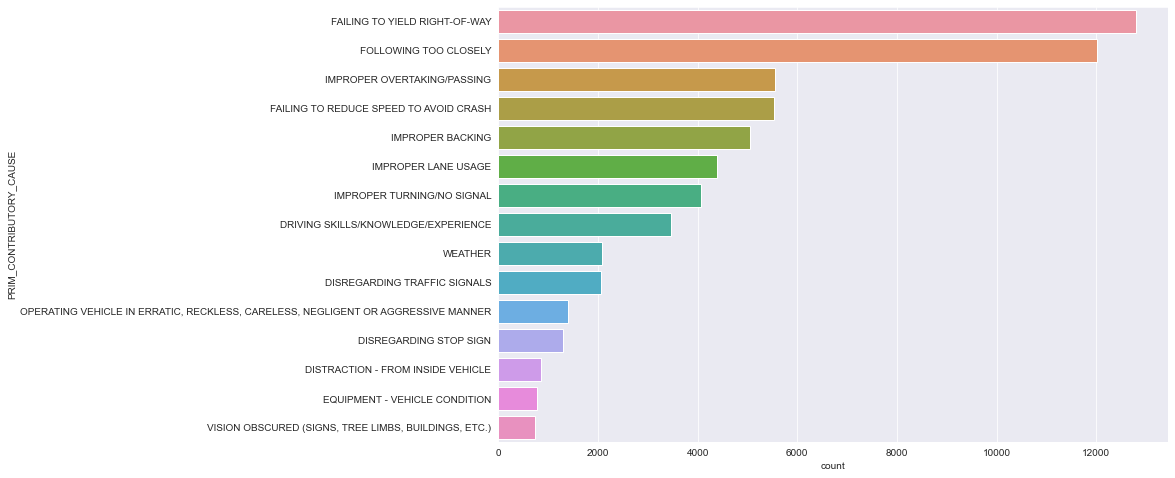

In [106]:
cntplot_sorted_value_h('PRIM_CONTRIBUTORY_CAUSE', known_cause)

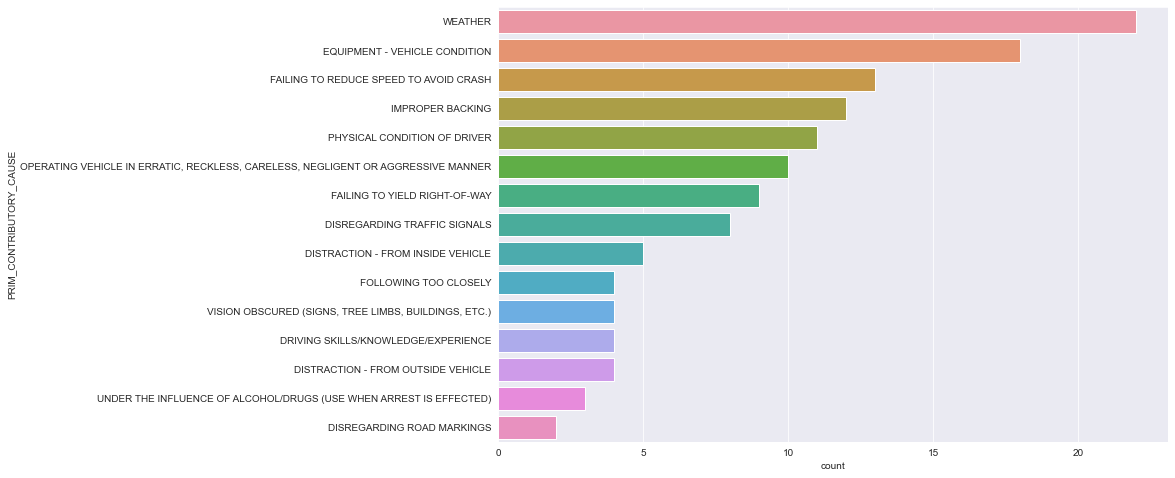

In [122]:
cntplot_sorted_value_h('PRIM_CONTRIBUTORY_CAUSE', known_cause[known_cause['INJURIES_FATAL']!=0])

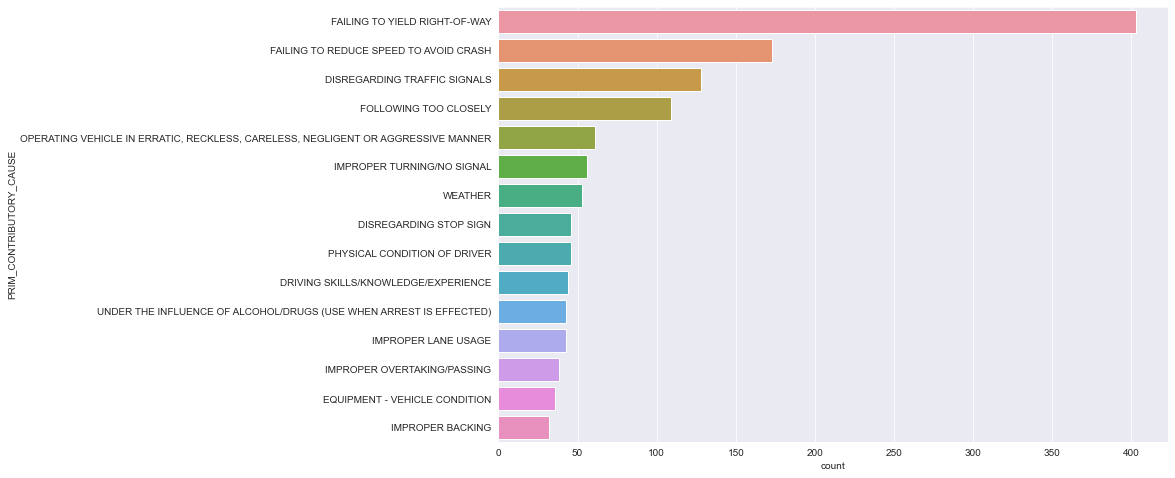

In [121]:
cntplot_sorted_value_h('PRIM_CONTRIBUTORY_CAUSE', known_cause[known_cause['INJURIES_INCAPACITATING']!=0])

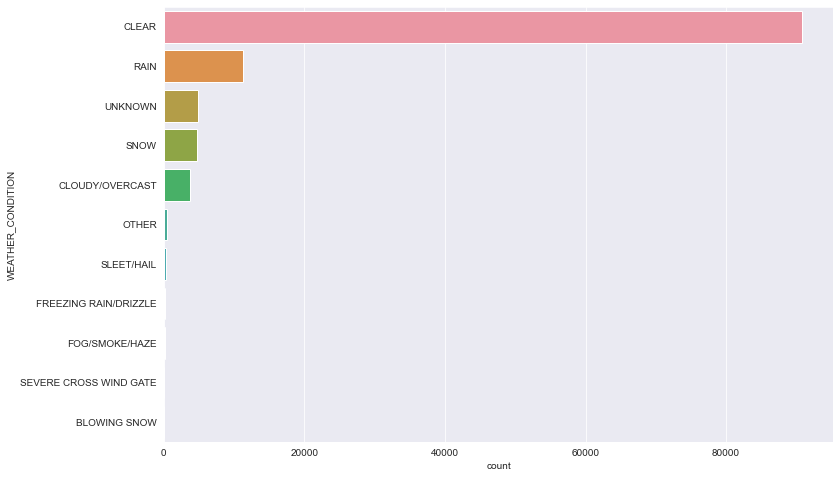

In [107]:
cntplot_sorted_value_h('WEATHER_CONDITION' , df_19)

Surprisingly, bad weather does not seem to be a huge  contributory factor

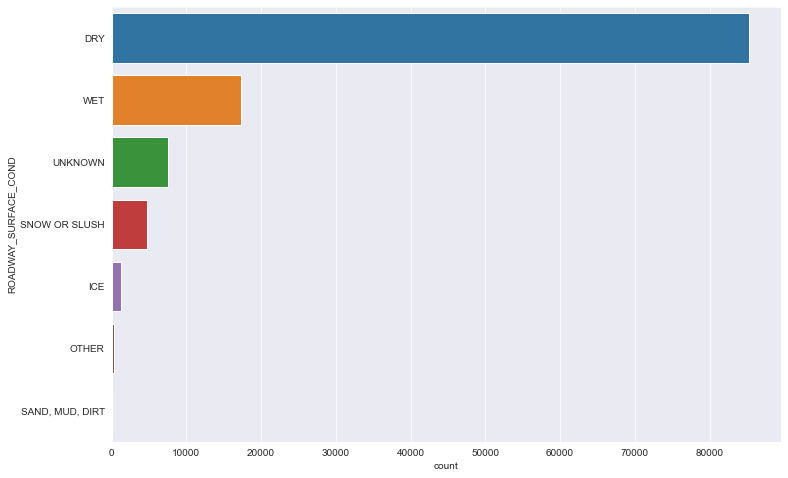

In [108]:
cntplot_sorted_value_h('ROADWAY_SURFACE_COND', df_19)

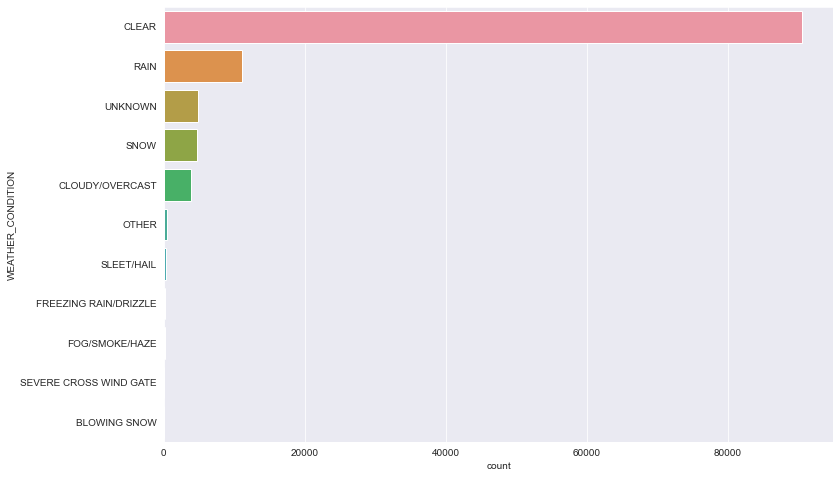

In [117]:
cntplot_sorted_value_h('WEATHER_CONDITION', df_19[df_19['INJURIES_FATAL']==0])

Confirms the conclusion from the weather plot

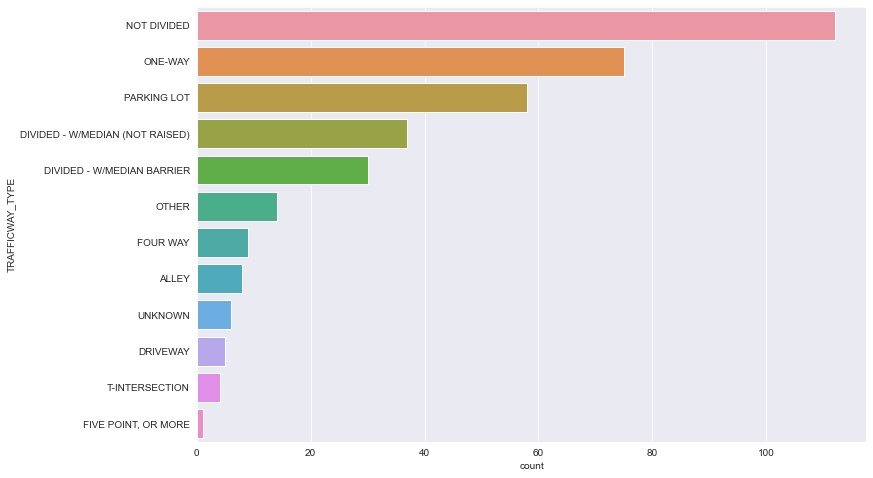

In [122]:
cntplot_sorted_value_h('TRAFFICWAY_TYPE', df_19[df_19['INJURIES_FATAL']!=0])

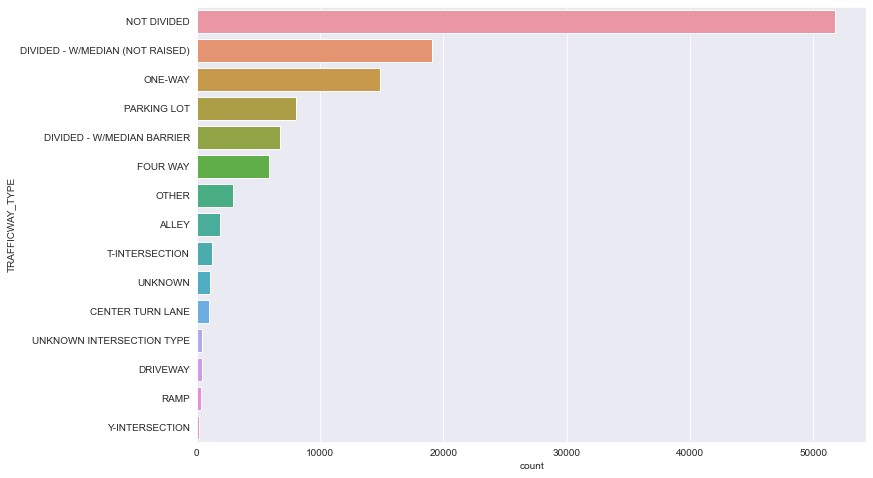

In [123]:
cntplot_sorted_value_h('TRAFFICWAY_TYPE', df_19[df_19['INJURIES_FATAL']==0])

Not divided Trafficways have more than twice the number of crashes of the next highest number of crashes by trafficway

In [98]:
def countplt( x , data):
    sns.countplot( x = x,
                 data = data);

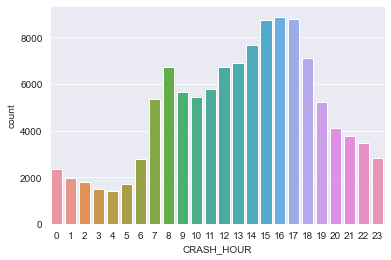

In [110]:
countplt('CRASH_HOUR', df_19)

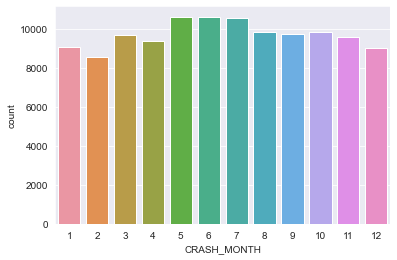

In [111]:
countplt('CRASH_MONTH', df_19)

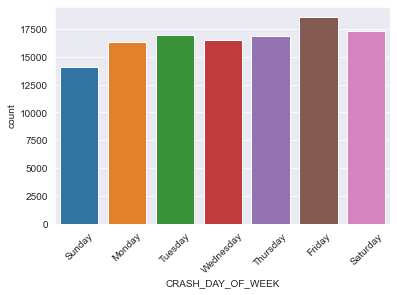

In [134]:
countplt('CRASH_DAY_OF_WEEK', df_19)
plt.xticks(ticks= [0,1,2,3,4,5,6],
           labels = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],
           rotation = 45);

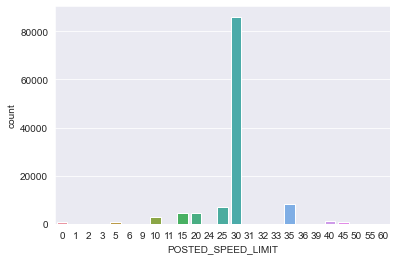

In [101]:
countplt('POSTED_SPEED_LIMIT' , df_19) 

In [115]:
 df_19['DEVICE_CONDITION'].value_counts()

NO CONTROLS                 67144
FUNCTIONING PROPERLY        40801
UNKNOWN                      6587
OTHER                        1018
FUNCTIONING IMPROPERLY        555
NOT FUNCTIONING               343
WORN REFLECTIVE MATERIAL       44
MISSING                        18
Name: DEVICE_CONDITION, dtype: int64

In [128]:
df_19[(df_19['INJURIES_FATAL']!=0) & (df_19['PRIM_CONTRIBUTORY_CAUSE'] == 'WEATHER')]

,CRASH_RECORD_ID,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,BEAT_OF_OCCURRENCE,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
4193,3a16e40a5ea4cee1f5526edea55e1dff6cf9927405736e85aee...,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",OTHER NONCOLLISION,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",WEATHER,WEATHER,122,1,NO INDICATION OF INJURY,0,0,0,0,0,0,23,3,1
11159,493af341b6f43a5a484106a3b609978a3ce8fd19431c7785d38...,30,NO CONTROLS,NO CONTROLS,OTHER,DARKNESS,OTHER OBJECT,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",WEATHER,NOT APPLICABLE,1634,2,NO INDICATION OF INJURY,0,0,0,0,0,0,20,5,2
12593,4bdc9f28dba38cd6a02f3c9b59c975b7d63037b5b2455a0e944...,10,NO CONTROLS,NO CONTROLS,UNKNOWN,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,STRAIGHT ON HILLCREST,ICE,UNKNOWN,NO INJURY / DRIVE AWAY,"OVER $1,500",WEATHER,UNABLE TO DETERMINE,2212,2,NO INDICATION OF INJURY,0,0,0,0,0,0,10,3,2
16359,4319e8c3b24be8306f817adfb1c7341b070db1df303a5eb466a...,25,NO CONTROLS,NO CONTROLS,SEVERE CROSS WIND GATE,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",WEATHER,NOT APPLICABLE,1631,4,NO INDICATION OF INJURY,0,0,0,0,0,0,12,1,2
16434,82e6d2e85a2ee233950a8d5d1d722edb3d1bf76fed5c251f645...,30,NO CONTROLS,NO CONTROLS,SEVERE CROSS WIND GATE,DAYLIGHT,OTHER OBJECT,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,UNKNOWN,NO INJURY / DRIVE AWAY,"OVER $1,500",WEATHER,UNABLE TO DETERMINE,1915,1,NO INDICATION OF INJURY,0,0,0,0,0,0,16,1,2
19405,d025d9837226639046d3d740922683b8d98fa8f4ab6680f206f...,15,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,$500 OR LESS,WEATHER,NOT APPLICABLE,712,2,NO INDICATION OF INJURY,0,0,0,0,0,0,12,4,3
21962,db94899b89e27abedeb405ba950542995658a6270073ba6799a...,15,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",WEATHER,WEATHER,1712,2,NO INDICATION OF INJURY,0,0,0,0,0,0,18,5,3
31745,fecfdcb303b6b97260affee2be26dc3c61388bc0d3dfa5e0164...,30,NO CONTROLS,NO CONTROLS,SNOW,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,SNOW OR SLUSH,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",WEATHER,NOT APPLICABLE,1634,3,NO INDICATION OF INJURY,0,0,0,0,0,0,10,1,4
34213,f7dda79a6d57a7fc3c000c2470f797d7d618b6e5d8babd3be6d...,15,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",WEATHER,WEATHER,124,2,NO INDICATION OF INJURY,0,0,0,0,0,0,15,2,4
35922,44a010da622254358b46ebc4821c17f3308b871c7c313e2e9ca...,25,NO CONTROLS,NO CONTROLS,SNOW,"DARKNESS, LIGHTED ROAD",OTHER OBJECT,ONE-WAY,STRAIGHT AND LEVEL,SNOW OR SLUSH,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",WEATHER,NOT APPLICABLE,1723,1,NO INDICATION OF INJURY,0,0,0,0,0,0,19,7,4


In [98]:
df_model = pd.read_csv('./data/cluster_info.csv')

In [99]:
df_19['cluster'] = df_model['cluster']

In [100]:
df_19.head()

,RD_NO,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,BEAT_OF_OCCURRENCE,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,cluster
0,JC111663,35,NO CONTROLS,NO CONTROLS,UNKNOWN,UNKNOWN,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,235,2,NO INDICATION OF INJURY,0,0,0,0,0,1,0,3,1,0
1,JC100635,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,1123,2,NO INDICATION OF INJURY,0,0,0,0,0,1,0,3,1,0
2,JC100780,30,NO CONTROLS,NO CONTROLS,UNKNOWN,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,1922,2,NO INDICATION OF INJURY,0,0,0,0,0,1,0,3,1,0
3,JC100033,20,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,ONE-WAY,STRAIGHT AND LEVEL,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",IMPROPER OVERTAKING/PASSING,DISREGARDING ROAD MARKINGS,122,2,NO INDICATION OF INJURY,0,0,0,0,0,2,0,3,1,0
4,JC100171,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,UNKNOWN,NO INJURY / DRIVE AWAY,"OVER $1,500","OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, N...",FAILING TO REDUCE SPEED TO AVOID CRASH,1624,3,NO INDICATION OF INJURY,0,0,0,0,0,5,0,3,1,0


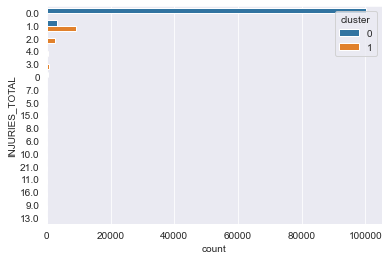

In [129]:
 sns.countplot( y = 'INJURIES_TOTAL' , 
                   data = df_19,
                   hue = df_19['cluster']
                 );
    

In [102]:
known_cause = df_19[(df_19['PRIM_CONTRIBUTORY_CAUSE'] != 'UNABLE TO DETERMINE')
                    & (df_19['PRIM_CONTRIBUTORY_CAUSE'] != 'NOT APPLICABLE') ]

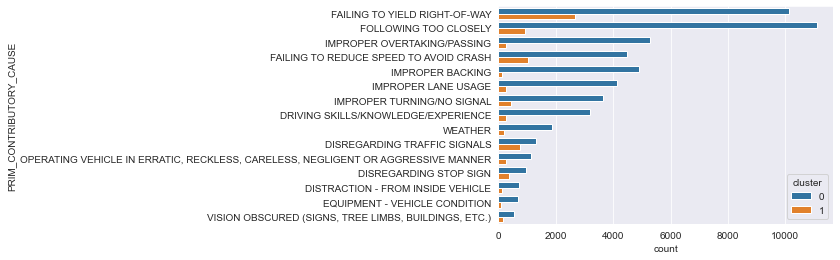

In [103]:
 sns.countplot( y = 'PRIM_CONTRIBUTORY_CAUSE' , 
                   data = known_cause,
                   hue = known_cause['cluster'],
                  order =known_cause['PRIM_CONTRIBUTORY_CAUSE'].value_counts().index[:15])

In [84]:
df_19['cluster'].value_counts()

0    103622
1     12888
Name: cluster, dtype: int64

In [132]:
df_19.drop(columns = ['BEAT_OF_OCCURRENCE'], inplace=True)

In [133]:
df_19.groupby('cluster').mean().T

cluster,0,1
POSTED_SPEED_LIMIT,28.288649,29.651092
NUM_UNITS,2.016086,2.135413
CRASH_HOUR,13.122201,13.183463
CRASH_DAY_OF_WEEK,4.121034,4.119501
CRASH_MONTH,6.509326,6.758814


In [105]:
df_model.groupby('cluster').mean().T

cluster,0,1
POSTED_SPEED_LIMIT,28.274437,29.658109
NUM_UNITS,2.015842,2.135112
MOST_SEVERE_INJURY,0.000019,0.876289
CRASH_HOUR,13.120324,13.182735
CRASH_DAY_OF_WEEK,4.118832,4.117971
CRASH_MONTH,6.514302,6.759094
INJURIES_TOTAL,0.033539,1.464981
INJURIES_FATAL,0.000000,0.008377
INJURIES_INCAPACITATING,0.000000,0.184053
INJURIES_NON_INCAPACITATING,0.000019,0.977895


In [106]:
df_19.columns

Index(['RD_NO', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE',
       'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE', 'DAMAGE',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE',
       'BEAT_OF_OCCURRENCE', 'NUM_UNITS', 'MOST_SEVERE_INJURY',
       'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
       'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
       'INJURIES_NO_INDICATION', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK',
       'CRASH_MONTH', 'cluster'],
      dtype='object')

In [109]:
injury_cols

['INJURIES_TOTAL',
 'INJURIES_FATAL',
 'INJURIES_INCAPACITATING',
 'INJURIES_NON_INCAPACITATING',
 'INJURIES_REPORTED_NOT_EVIDENT',
 'INJURIES_NO_INDICATION']

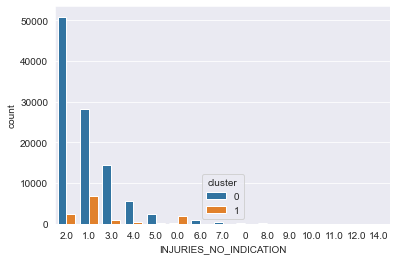

In [115]:
sns.countplot(x = df_19['INJURIES_NO_INDICATION'], hue = df_19['cluster'], order =df_19['INJURIES_NO_INDICATION'].value_counts().index[:15]);

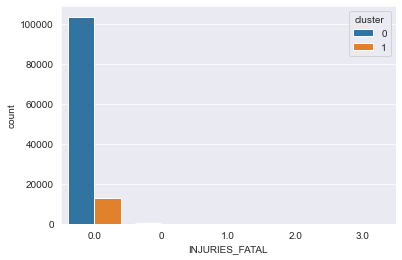

In [116]:
sns.countplot(x = df_19['INJURIES_FATAL'], hue = df_19['cluster'], order =df_19['INJURIES_FATAL'].value_counts().index[:15]);

In [134]:
df_19.columns

Index(['RD_NO', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE',
       'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE', 'DAMAGE',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'cluster'],
      dtype='object')

In [137]:
df_daylight = df_19[df_19['LIGHTING_CONDITION']=='DAYLIGHT']

In [140]:
df_daylight['INJURIES_FATAL'].value_counts(normalize=True)

0.0    0.997843
0      0.001582
1.0    0.000549
3.0    0.000013
2.0    0.000013
Name: INJURIES_FATAL, dtype: float64

In [141]:
df_19['INJURIES_FATAL'].value_counts(normalize=True)

0.0    0.996919
0      0.002223
1.0    0.000815
2.0    0.000034
3.0    0.000009
Name: INJURIES_FATAL, dtype: float64